<font size = 8 color ='336EFF'>Simulated Annealing</font>

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

Import Libraries

In [1]:
# Simulated Annealing search of a two dimensional objective function
import numpy as np
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

#Define Objective Function

image.png

In [2]:
# objective function in a function
def objective(x):
    return x[0]**2.0 -x[0] + np.sin(x[1])

In [3]:
#Checks if solution is in bounds
def reset_boud(x, bounds):
    for n in range(bounds.shape[0]):
        if x[n] < bounds[n, 0]:
            x[n] = bounds[n, 0]
        if x[n] > bounds[n, 1]:
            x[n] = bounds[n, 1]
    return x

# Define Simulated Annealing function

In [4]:
def simulatedAnnealing(objective, bounds, n_iterations, step_size, Tini, Tfin, maxEpochs, x0):
    # Generating an initial point, we use the point given in the function
    solution = asarray(x0)
    # Evaluating the initial point
    solution_eval = objective(solution)

    #Calculating delta
    deltaT = (Tini - Tfin)/maxEpochs

    #We initialize a list to store our solutions
    solutions = list()
    solutions.append(solution)

    for epoch in range(maxEpochs):
        T = Tini - deltaT * epoch

        for i in range(n_iterations):
          #We generate candidates for solutions
            candidate = solution + randn(len(bounds)) * step_size
            deltae = objective(candidate) - objective(solution)
            #We check if our candidate is a better solution, if so we save as best solution.
            if deltae < 0:
                solution = candidate
            else:
                P = np.exp(-deltae/T)
                if rand(1) <= P:
                    solution = candidate
            #We call this function to prevent it from going to bounds.
            solution = reset_boud(solution, bounds)

        solutions.append(solution)

        solution_eval = objective(solution)

    return [solution, solution_eval]

Define Main Function

In [5]:
np.random.seed(5)

# We defined our range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])

# We define the maximum number of iterations
n_iterations = 50

# We define the step_size, this was given in the problem.
step_size = 0.1

#Initial temperature
Tini = 1

#Final temperature
Tfin = 0.01

#Epochs
totalEpochs = 100

# initial point given by the problem
x0 = [3, -1]

# We perform the Simulated Annealing search
best, score = simulatedAnnealing(objective, bounds, n_iterations, step_size, Tini, Tfin, totalEpochs, x0)[:2]

print('The Annealing algorithm gives the following minimum:')
print('f([%.5f, %.5f]) = %.5f' % (best[0], best[1], score))
print('We can see that the aproximation is close given the visualization of z value.')

The Annealing algorithm gives the following minimum:
f([0.49741, -1.51063]) = -1.24818
We can see that the aproximation is close given the visualization of z value.


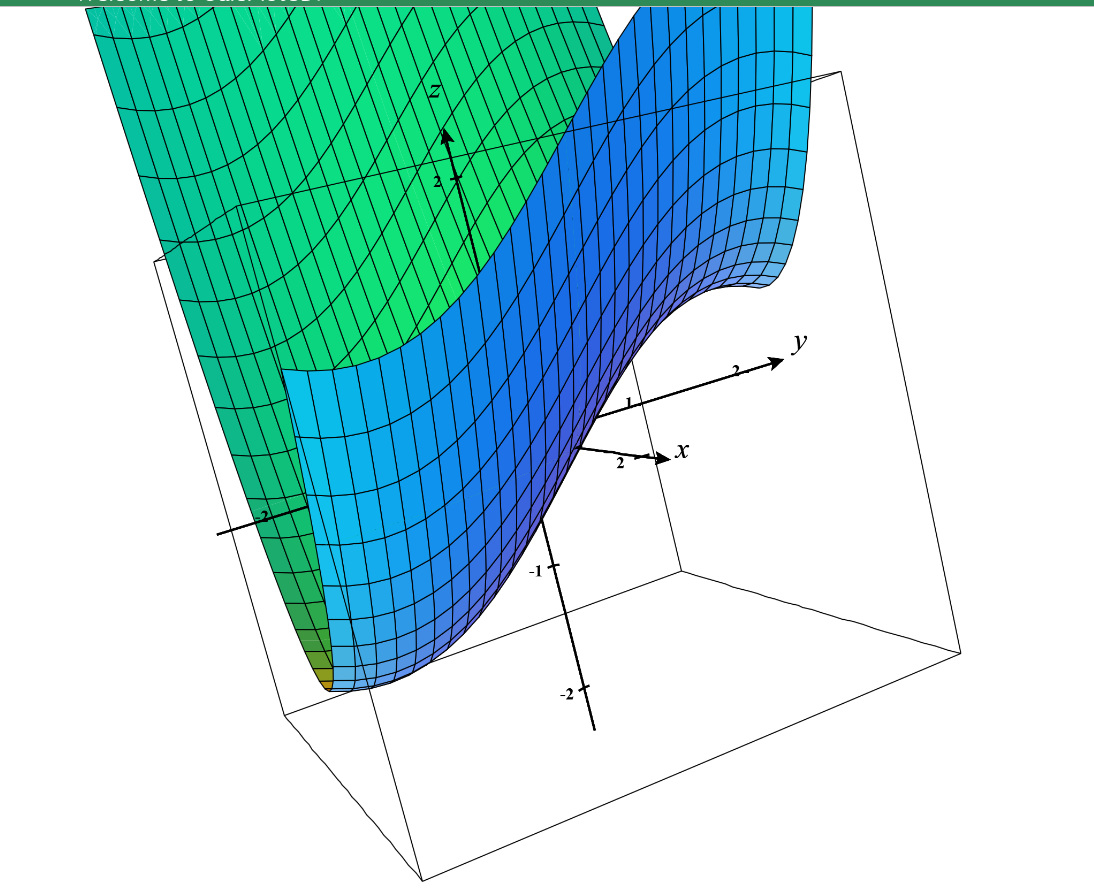